## Supervised Learning: **Regression**
___
#### This project aims to develop a Machine Learning algorithm to predict the average house price in Boston. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv("housing.csv", sep=",", encoding="iso-8859-1")
df.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [4]:
df.shape


(489, 4)

### **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

#### Valores Missing (NAN)


In [5]:
# Relação da Quantidade
df.isnull().sum()


RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

#### Análise dos tipos de atributos.

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

#### Dados Estatísticos

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


#### Análise dos Outliers

In [8]:
boxplot = px.box(df, y="RM")
boxplot.show()


In [9]:
boxplot = px.box(df, y="LSTAT", template="seaborn")
boxplot.show()

In [10]:
boxplot = px.box(df, y="PTRATIO", template="seaborn")
boxplot.show()

In [11]:
boxplot = px.box(df, y="MEDV", template="seaborn")
boxplot.show()

#### CORRELAÇÃO LINEAR

In [12]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [13]:
fig = px.scatter(df, x='RM', y='MEDV', title='Correlação', labels={'RM': 'Quantidade de Cômodos', 'MEDV': 'Valor Médio'},
                 color="RM",
                 template="plotly_dark")
fig.update_xaxes(showgrid=True)  # Remover a grade do eixo x
fig.update_yaxes(showgrid=True)  # Remover a grade do eixo y
fig.show()

In [14]:
fig = px.scatter(df, x='LSTAT', y='MEDV', title='Correlação', labels={'LSTAT': 'Quantidade Classe Baixa (%)', 'MEDV': 'Valor Médio'},
                 color="LSTAT",
                 template="plotly_dark")
fig.update_xaxes(showgrid=True)  # Remover a grade do eixo x
fig.update_yaxes(showgrid=True)  # Remover a grade do eixo y
fig.show()

In [15]:
fig = px.scatter(df, x='PTRATIO', y='MEDV', title='Correlação', labels={'PTRATIO': 'Estudantes/Professores', 'MEDV': 'Valor Médio'},
                 color="PTRATIO",
                 template="plotly_dark")
fig.update_xaxes(showgrid=True)  # Remover a grade do eixo x
fig.update_yaxes(showgrid=True)  # Remover a grade do eixo y
fig.show()

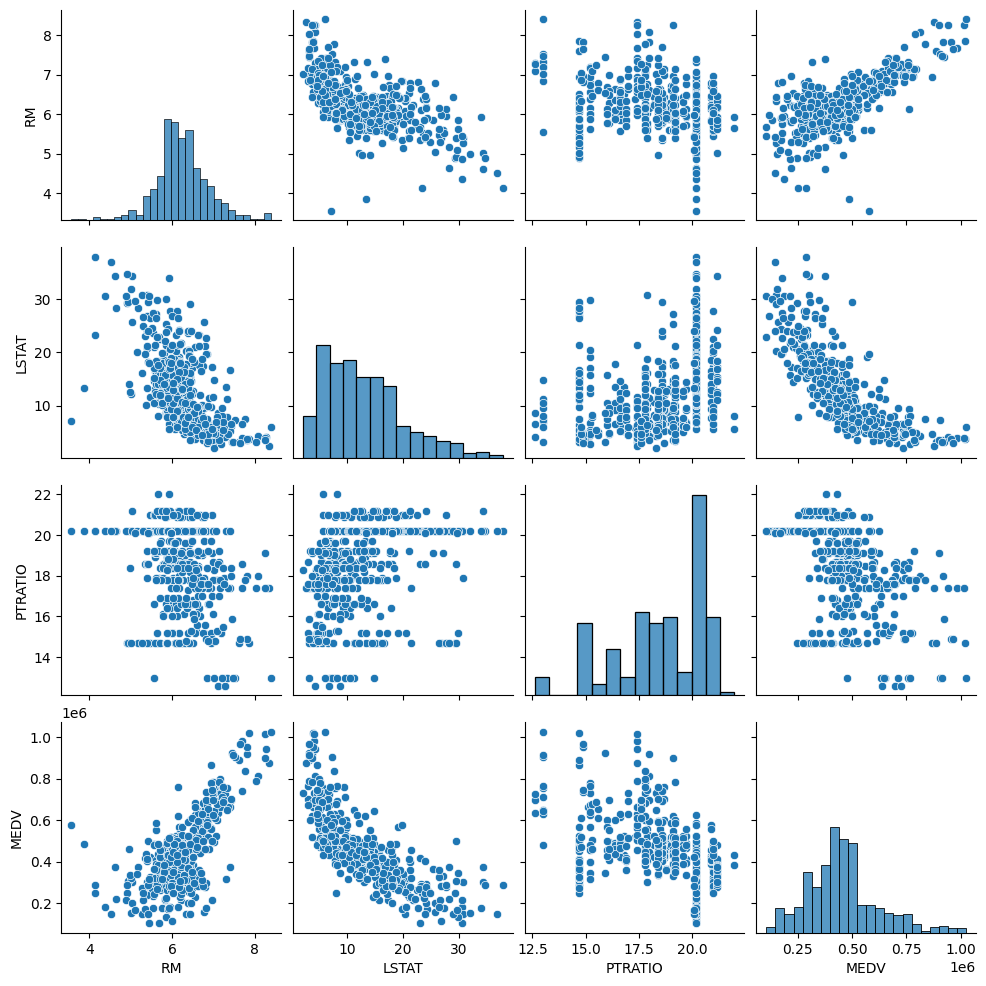

In [16]:
# Suprimir os avisos de FutureWarning temporariamente
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    # Seu código usando Seaborn aqui
    sns.pairplot(df)
    # Ou qualquer outro código que gere esses avisos

# Restaurar as configurações padrão de aviso
warnings.resetwarnings()

#### Análise de Normalidade

##### Gráfico QQ-Plot

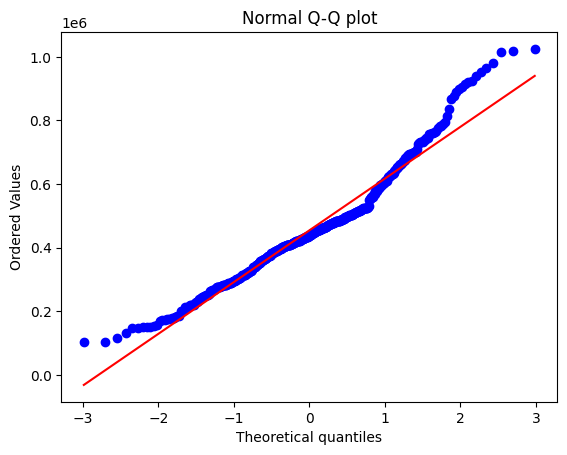

In [17]:
stats.probplot(df.MEDV, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [18]:
# Ignorar avisos de depreciação temporariamente
warnings.filterwarnings("ignore", category=DeprecationWarning)

hist =  px.histogram (df,  x = "MEDV", nbins=60, template="plotly_dark") 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

# Restaurar as configurações padrão de aviso
warnings.resetwarnings()

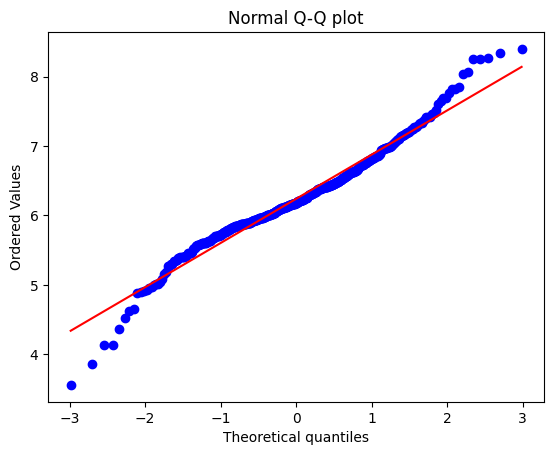

In [19]:
stats.probplot(df.RM, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [20]:
# Ignorar avisos de depreciação temporariamente
warnings.filterwarnings("ignore", category=DeprecationWarning)

hist =  px.histogram (df,  x = "RM", nbins=60, template="plotly_dark") 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

# Restaurar as configurações padrão de aviso
warnings.resetwarnings()

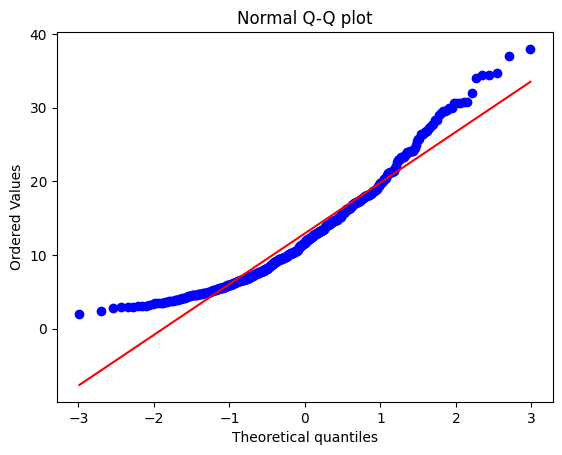

In [21]:
stats.probplot(df.LSTAT, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [22]:
# Ignorar avisos de depreciação temporariamente
warnings.filterwarnings("ignore", category=DeprecationWarning)

hist =  px.histogram (df,  x = "LSTAT", nbins=60, template="plotly_dark") 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

# Restaurar as configurações padrão de aviso
warnings.resetwarnings()

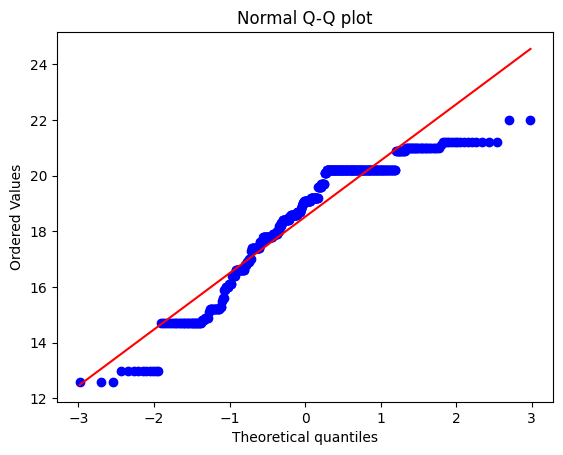

In [23]:
stats.probplot(df.PTRATIO, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [24]:
# Ignorar avisos de depreciação temporariamente
warnings.filterwarnings("ignore", category=DeprecationWarning)

hist =  px.histogram (df,  x = "PTRATIO", nbins=60, template="plotly_dark") 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

# Restaurar as configurações padrão de aviso
warnings.resetwarnings()

### Teste de Shapiro-Wilk
___
#### Ho = distribuição normal: p > 0,05
#### Ha = distribuição != normal: p <= 0,05

In [25]:
stats.shapiro(df.MEDV)

ShapiroResult(statistic=0.9596619009971619, pvalue=2.576278634869311e-10)

In [26]:
X, y = stats.shapiro(df.MEDV)
print(f"Estatística do teste: {X}")
print(f"p-valor: {y}")

Estatística do teste: 0.9596619009971619
p-valor: 2.576278634869311e-10


In [27]:
X, y = stats.shapiro(df.RM)
print(f"Estatística do teste: {X}")
print(f"p-valor: {y}")

Estatística do teste: 0.9708168506622314
p-valor: 2.7087743603715353e-08


In [28]:
X, y = stats.shapiro(df.LSTAT)
print(f"Estatística do teste: {X}")
print(f"p-valor: {y}")

Estatística do teste: 0.9371760487556458
p-valor: 1.690046079428839e-13


In [29]:
X, y = stats.shapiro(df.PTRATIO)
print(f"Estatística do teste: {X}")
print(f"p-valor: {y}")

Estatística do teste: 0.9064791202545166
p-valor: 9.074104483513219e-17


In [30]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D, Rank2D

/Users/data_science_br/Documents/Projetos/project_housing/venv/lib/python3.10/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/data_science_br/Documents/Projetos/project_housing/venv/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/data_science_br/Documents/Projetos/project_housing/venv/lib/python3.10/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



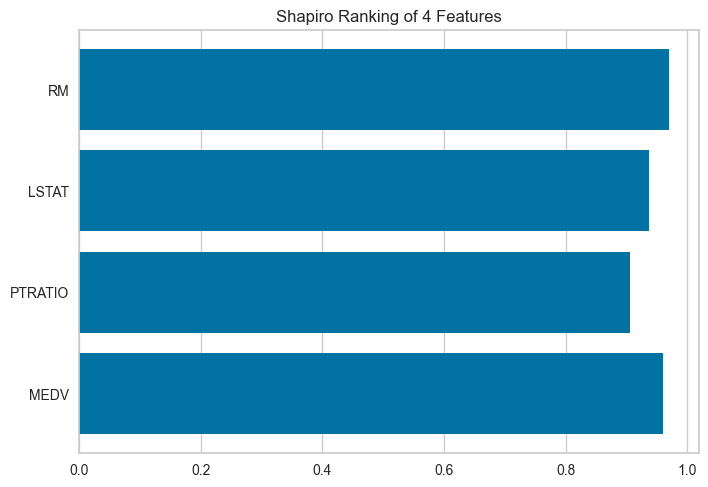

<Axes: title={'center': 'Shapiro Ranking of 4 Features'}>

In [31]:
# Selecionando as colunas para o teste de Shapiro
columns = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
X = df[columns]

# Inicializando e plotando o Rank1D com o teste de Shapiro
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X)
visualizer.transform(X)
visualizer.show()

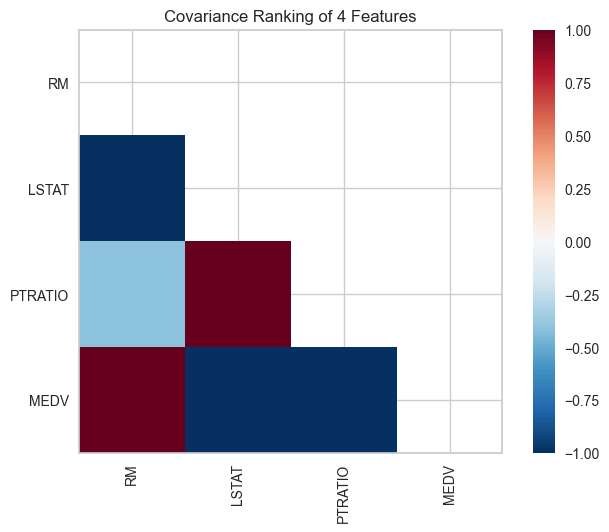

<Axes: title={'center': 'Covariance Ranking of 4 Features'}>

In [32]:
# Selecionando as colunas para o teste de Shapiro
columns = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
X = df[columns]

# Inicializando e plotando o Rank1D com o teste de Shapiro
visualizer = Rank2D(algorithm='covariance')
visualizer.fit(X)
visualizer.transform(X)
visualizer.show()

### Teste de Lillierfors (Kogomorov_Sminorv)
___
#### Ho = distribuição normal: p > 0,05
#### Ha = distribuição != normal: p <= 0,05

In [33]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV,  dist="norm")
print(f"Estatística do teste: {estatistica}")
print(f"p-valor: {p}")

Estatística do teste: 0.11370576407672117
p-valor: 0.0009999999999998899


In [34]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM,  dist="norm")
print(f"Estatística do teste: {estatistica}")
print(f"p-valor: {p}")

Estatística do teste: 0.06394344399233598
p-valor: 0.0009999999999998899


### Correlação Linear
___

#### Pearson (distribuição normal)
#### Spearman (distribuição não normal)
#### Kendall (distribuição não normal com quantidade pequena de amostras)
___

##### Ho = não há correlação linear: p > 0,05
##### Ha = existe correlação lienar: p <= 0,05

In [35]:
# Spearman
coef , p = stats.spearmanr(df.MEDV, df.RM)
print(f"Coeficiente de correlação: {coef}")
print(f"p-valor: {p}")

Coeficiente de correlação: 0.6240572939087418
p-valor: 3.84502863434338e-54


In [36]:
correlacoes = df.corr(method="spearman")
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


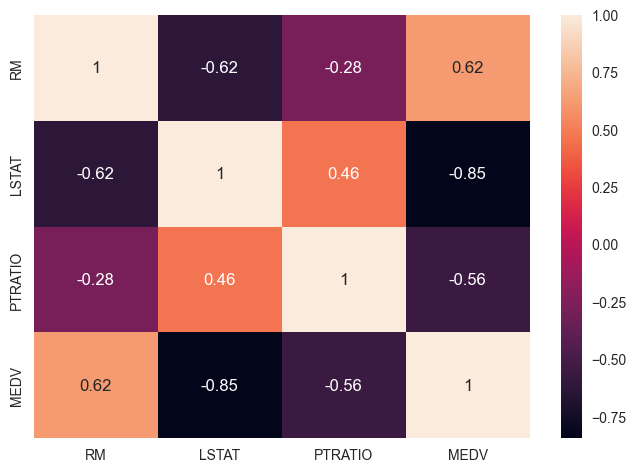

In [37]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**
___
### Valor médio (MEDV) em função do número de cômodos (RM)

In [38]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [39]:
x1 = df.iloc[:,0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [40]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [41]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state=10)

In [42]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [43]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [44]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [45]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

-626510.2699464131

In [46]:
# Coeficiente Angular
reg_linear1.coef_

array([173771.45170999])

**Equação: Valor = -626510,27 + 173771,45.número_cômodos**

In [47]:
reg_linear1.score(x_treino, y_treino)

0.46368351515551953

In [48]:
reg_linear1.score(x_teste, y_teste)

0.5426573915930195

In [49]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([551833.94409904, 468423.64727824, 647755.78544295, 658182.07254555,
       586414.46298932, 464600.67534062, 395265.86610833, 229487.901177  ,
       441141.52935977, 424980.78435074, 523161.65456689, 432105.41387085,
       555135.60168153,  44768.84800928, 504915.65213734, 424285.6985439 ,
       565735.66023583, 607962.12300136, 455912.10275512, 442531.70097345,
       505784.50939589, 450003.87339698, 410210.21095539, 390226.49400874,
       472767.93357099, 809884.54988837, 401174.09546647, 639762.29866429,
       465817.07550259, 491882.79325909, 437318.55742215, 416813.52612037,
       413164.32563446, 560870.05958795, 396134.72336688, 459561.30324103,
       335488.4867201 , 521423.94004979, 441315.30081148, 630899.95462708,
       452262.90226921, 557915.94490888, 437144.78597044, 391616.66562242,
       525420.68343912, 459735.07469274, 397872.43788398, 492925.42196935,
       387619.92223309, 533240.39876607, 487538.50696634, 608483.43735649,
       832822.38151409, 4

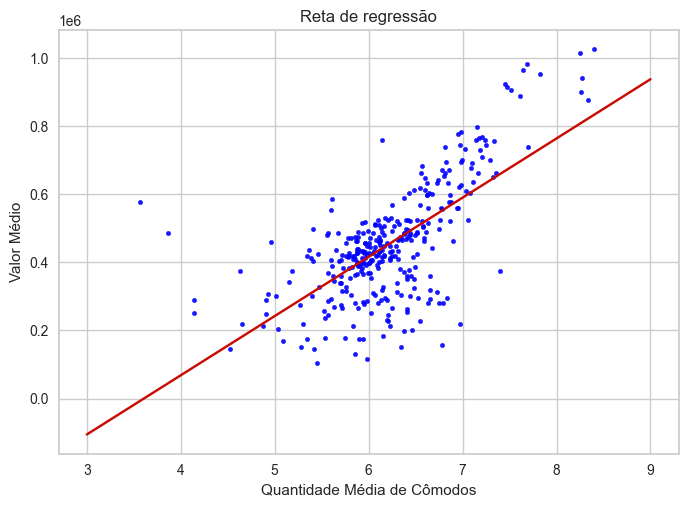

In [50]:
plt.scatter(y=y_treino, x=x_treino, color="blue", s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [51]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297126, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

In [52]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

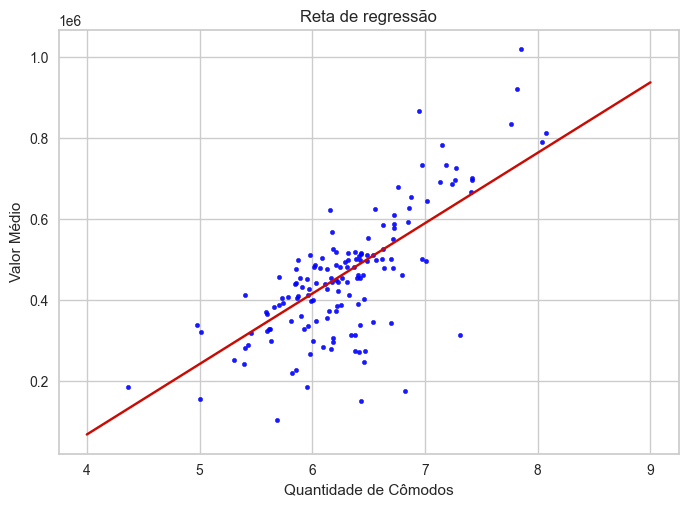

In [53]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [54]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

array([68575.53689355])

#### **Métricas de Desempenho**

In [55]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

76063.99733079871

In [56]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

76063.99733079871

In [57]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

11294624525.740473

In [58]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

106276.17101561607

### Valor médio (MEDV) em função da classe social (LSTAT)

In [59]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [60]:
x2 = df.iloc[:,1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [61]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [62]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [63]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [64]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [65]:
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [66]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

681977.7451055486

In [67]:
# Coeficiente Angular
reg_linear2.coef_

array([-17263.75010515])

#### **Equação: Valor = 681977,75 - 17263,75.LSTAT**

In [68]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

0.5688289563355992

In [69]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5

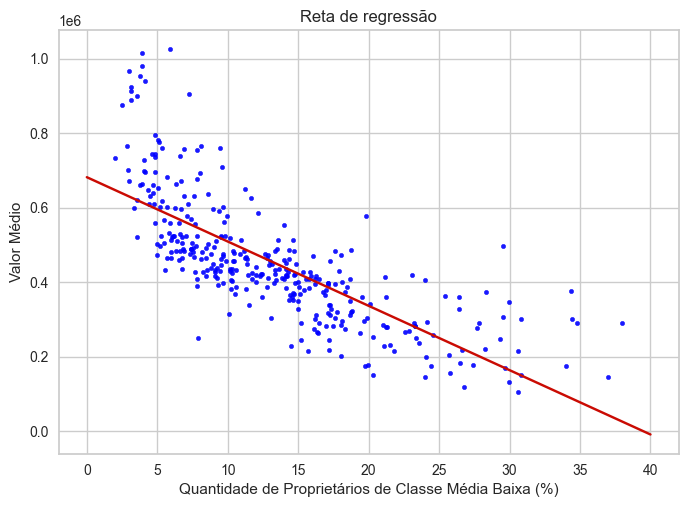

In [70]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [71]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

In [72]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

In [73]:
# Coeficiente de Determinação dados de teste
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

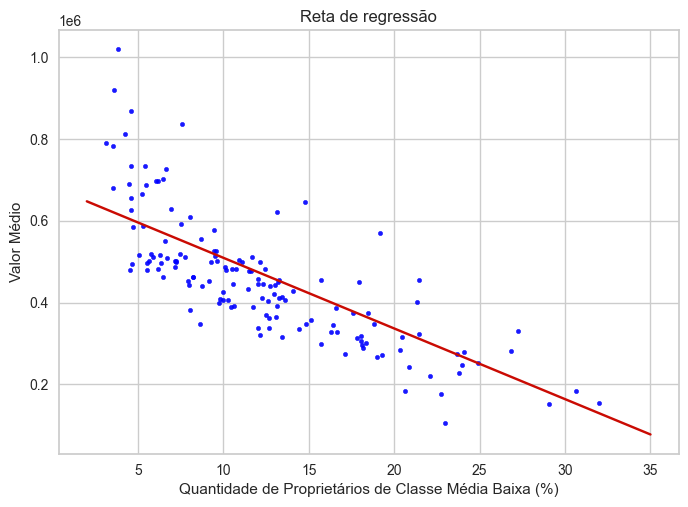

In [74]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [75]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear2.predict([[25]])
valor_casa

array([250383.99247685])

#### Métricas de desempenho

In [76]:
# erro absoluto
abs(y_teste - previsoes_teste).mean()

76340.55192245143

In [77]:
# erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245143

In [78]:
# erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

9863567949.634666

In [79]:
# raíz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

99315.49702657016

### **Validação Cruzada**

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [81]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [82]:
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [83]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 55.97%


**REGRESSÃO LINEAR SIMPLES:** R² = 0,57/0,60; RMSE = 99315,5; R² Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R² = 0,73/0,68; RMSE = 96087,3; R² Validação Cruzada: 69,25%

#### ***Avaliando a Regressão Linear Simples com Statsmodels***

In [84]:
import statsmodels.formula.api as smf

In [85]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [86]:
x2 = df.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [87]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [88]:
# criação do modelo
regressao = smf.ols("y ~ x2", data = df).fit()

In [89]:
residuos = regressao.resid
residuos

0      -91698.432398
1      -68220.791356
2      116130.471691
3       69473.109014
4      170717.234516
           ...      
484    -42008.495743
485    -90286.334256
486    -82077.460502
487   -107059.859907
488   -294297.192249
Length: 489, dtype: float64

### Teste de Normalidade dos Resíduos
___
#### Ho = Distribuição Normal: p > 0.05
#### Ha = Distribuição != Normal: p <= 0.05

In [90]:
import scipy.stats as stats

In [91]:
estatistica, p = stats.shapiro(residuos)
print(f"Estatística de teste {estatistica}")
print(f"p-valor {p}")

Estatística de teste 0.9171054363250732
p-valor 9.782289275424533e-16


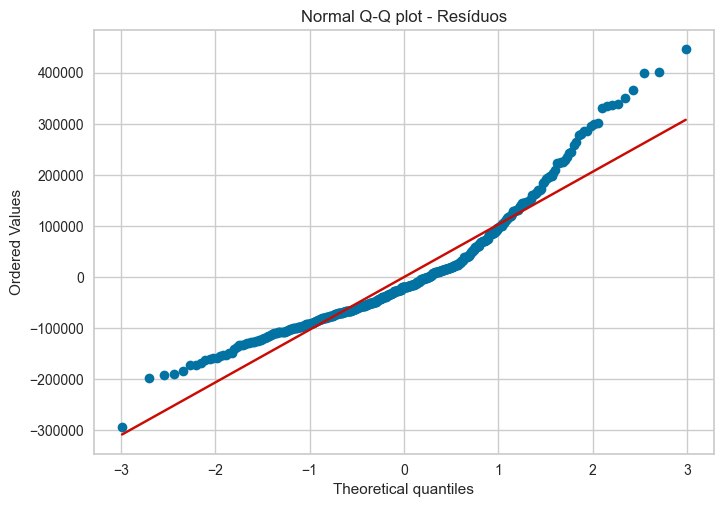

In [92]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### ***Análise da Homocedasticidade dos Resíduos***
___
#### (Resíduos com variação constante)

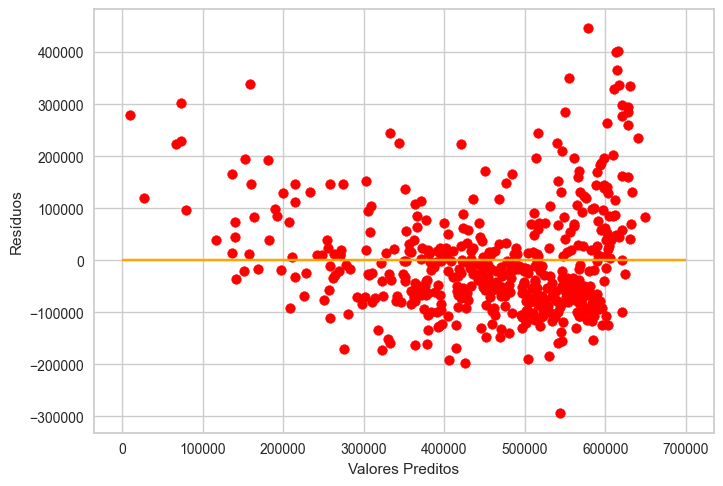

In [93]:
plt.scatter(y=residuos, x=regressao.predict(), color="red")
plt.hlines(y=0, xmin=0, xmax=700000, color="orange")
plt.ylabel("Resíduos")
plt.xlabel("Valores Preditos")
plt.show()

### ***Breusch-Pagan (Homocedasticidade e Heterocedasticidade)***
___
#### Ho = existe homocedasticidade: p > 0.05
#### Ha = não existe homocedasticidade: p <= 0.05

In [94]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [95]:
estatistica, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(f"Estatística de teste: {estatistica}")
print(f"p-valor: {p}")
print(f"f-valor: {f}")
print(f"f_p-valor: {fp}")

Estatística de teste: 5.382553364027109
p-valor: 0.02033908939912792
f-valor: 5.420200421872521
f_p-valor: 0.020313692181460546


#### Outliers dos resíduos
___
##### (Entre -3 e 3)

In [96]:
outliers = regressao.outlier_test()

In [97]:
outliers.max()

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [98]:
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

### Modelo de Regressão Linear

In [99]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.93e-93
Time:                        06:06:35   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

In [100]:
from yellowbrick.regressor import ResidualsPlot

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.1)

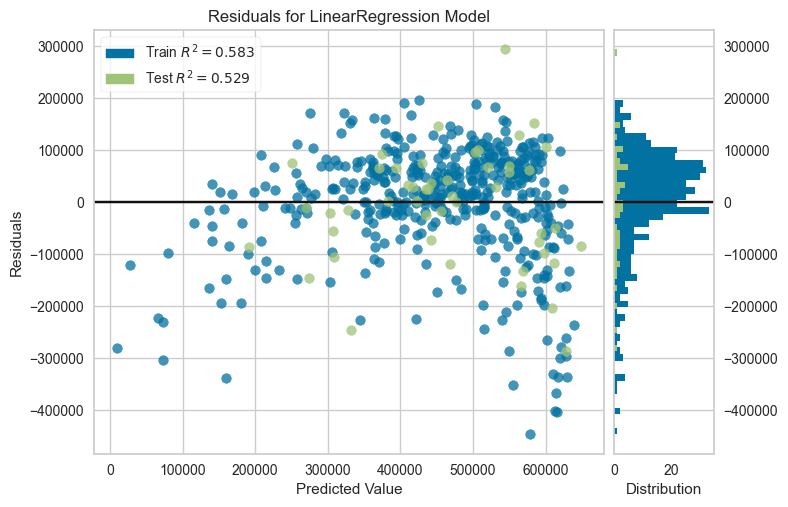

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [102]:
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [103]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

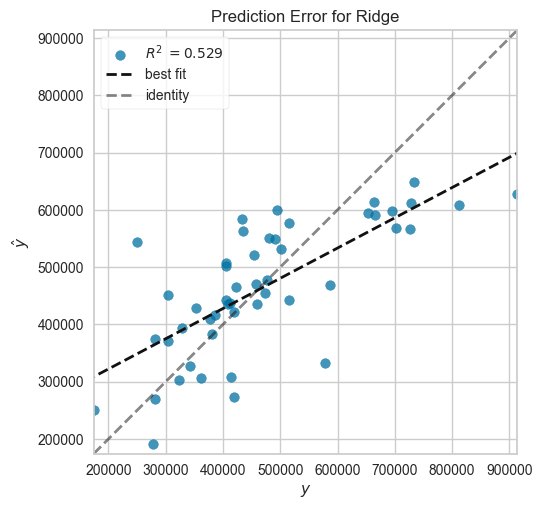

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [104]:
visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

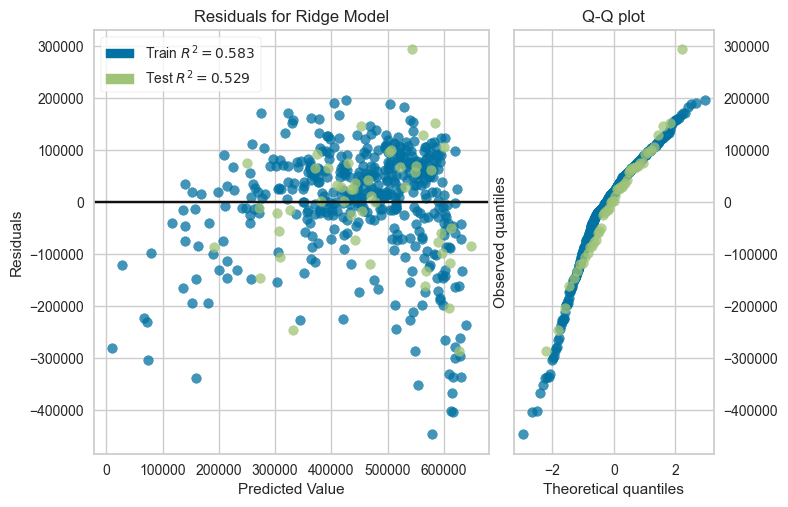

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [105]:
model = Ridge()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Estatística t:

#### Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

##### Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

##### **R^2 ajustado = 0,578**

In [106]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  684138.493068
x2         -17759.048327


**Equação: Valor = 684138,49 - 17759.04.LSTAT**

In [107]:
regressao.params

Intercept    684138.493068
x2           -17759.048327
dtype: float64

In [108]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [109]:
regressao.predict()

array([595698.43239814, 521820.79135628, 612569.52830915, 631926.89098598,
       589482.76548356, 591613.85128285, 463393.52235923, 344052.7175993 ,
       152610.17663024, 380458.76667041, 320965.95477372, 448475.92176424,
       405143.84384546, 537448.75388437, 501930.65722963, 533719.35373562,
       567283.95507435, 423613.25410592, 476535.21812149, 483816.42793571,
       310843.29722712, 438530.85470091, 351689.10838007, 331088.61232032,
       394666.00533231, 390936.60518356, 421126.98734009, 377262.13797148,
       456822.6744781 , 471385.09410655, 282784.00086987, 452560.50287954,
       192035.26391701, 358259.9562612 , 322919.45008973, 512230.9052595 ,
       481507.75165315, 528391.63923741, 504239.33351218, 607419.40429421,
       648975.57738026, 598184.69916398, 580958.42228643, 552011.17351281,
       514539.58154206, 502818.60964599, 432847.95923615, 350268.38451388,
       136982.21410216, 396441.91016504, 445279.29306531, 516670.66734134,
       590370.71789993, 5

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_40581/2767809450.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



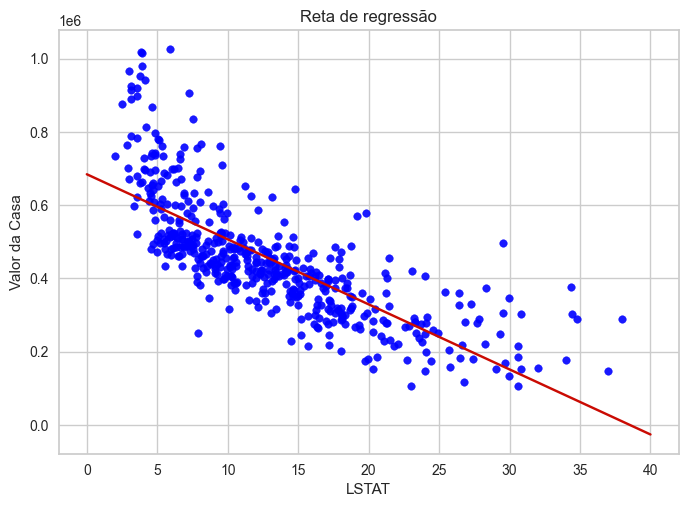

In [110]:
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=30, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor da Casa')
plt.xlabel('LSTAT')
plt.show();